# Exercises in Clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

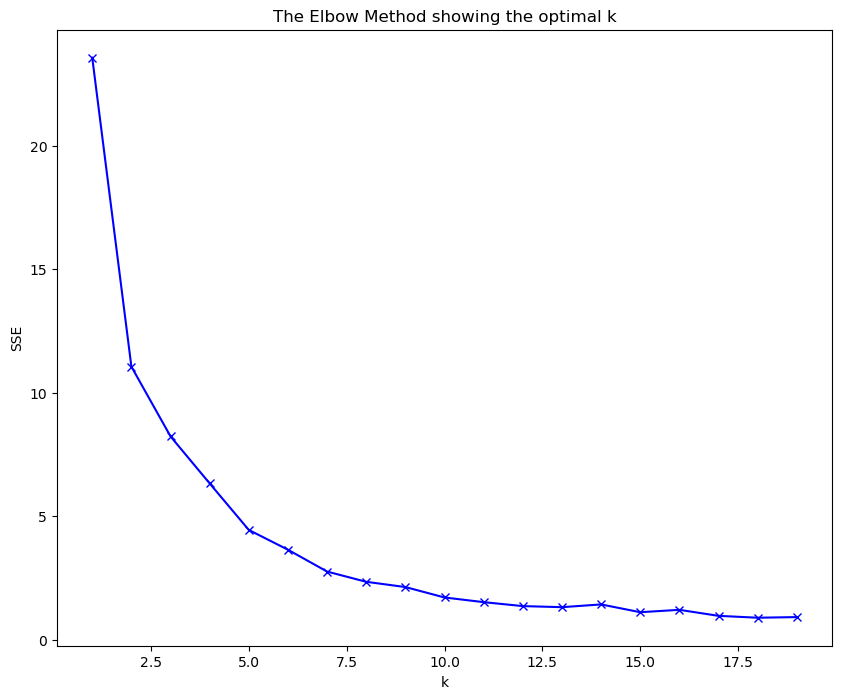

In [2]:
data = pd.read_csv('Ch5_bike_station_locations.csv')
data.head()

minMaxScaler = MinMaxScaler()


data_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(data), columns=data.columns)

errors = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled_mm)
    errors.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()


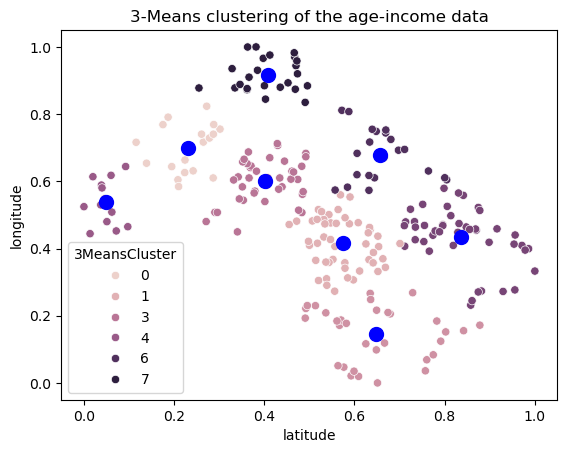

In [3]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_scaled_mm)

data_scaled_mm['3MeansCluster'] = kmeans.labels_

sns.scatterplot(data = data_scaled_mm, x='latitude', y='longitude', hue = '3MeansCluster')
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color='blue', s = 100)
plt.title('3-Means clustering of the age-income data')
plt.show()

In [4]:
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(data), columns=data.columns)


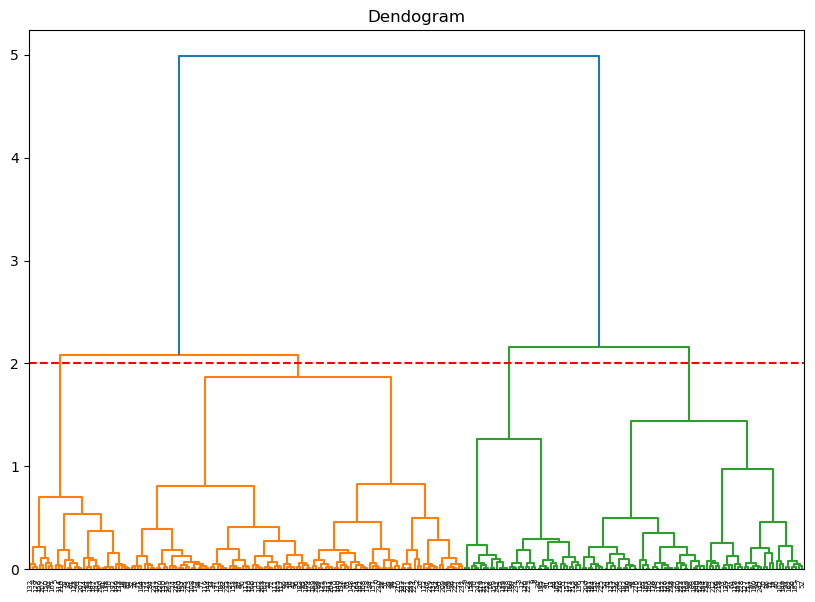

In [5]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X_scaled_mm, method='ward'))

plt.axhline(y=2, color='r', linestyle='--')

plt.show()

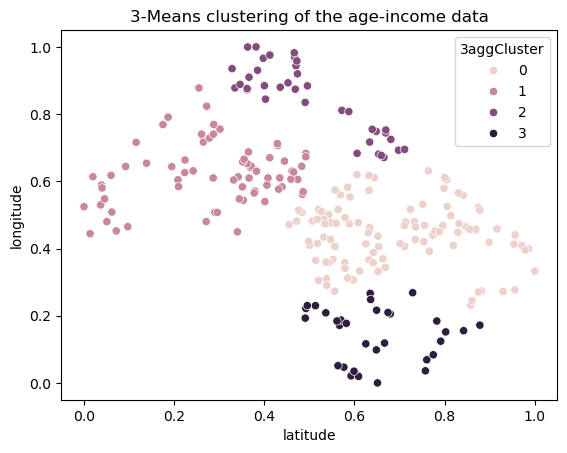

In [6]:
aggClustering = AgglomerativeClustering(n_clusters=4)
aggClustering.fit(X_scaled_mm)

X_scaled_mm["3aggCluster"] = aggClustering.labels_

sns.scatterplot(data = X_scaled_mm, x='latitude', y='longitude', hue = '3aggCluster')
plt.title('3-Means clustering of the age-income data')
plt.show()

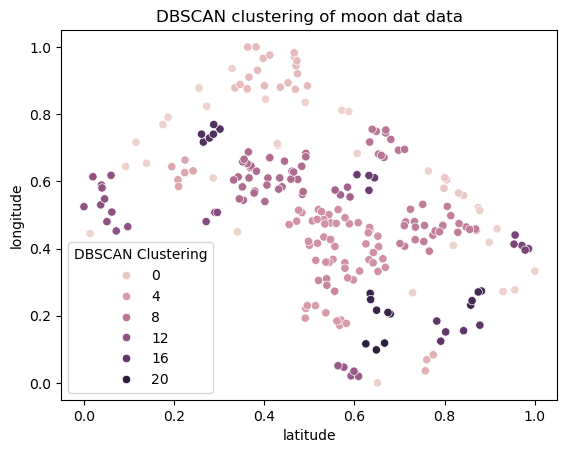

In [7]:
X_DBSCAN = pd.DataFrame(minMaxScaler.fit_transform(data), columns=data.columns)


dbscan = DBSCAN(min_samples=3 ,eps=0.04)

X_DBSCAN["DBSCAN Clustering"] = dbscan.fit_predict(X_DBSCAN)  

sns.scatterplot(data = X_DBSCAN, x='latitude', y='longitude', hue = "DBSCAN Clustering")
plt.title("DBSCAN clustering of moon dat data")
plt.show()


<Axes: xlabel='latitude', ylabel='longitude'>

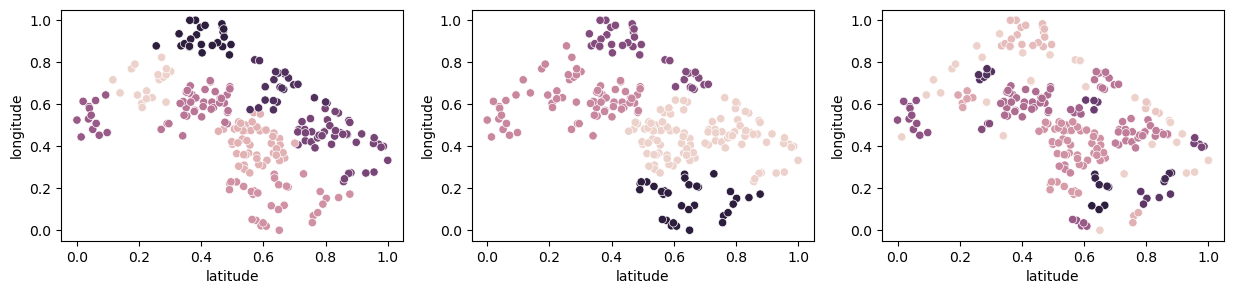

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.scatterplot(data = data_scaled_mm, x='latitude', y='longitude', hue = '3MeansCluster', ax=axes[0],legend=False)
sns.scatterplot(data = X_scaled_mm, x='latitude', y='longitude', hue = '3aggCluster', ax=axes[1],legend=False)
sns.scatterplot(data = X_DBSCAN, x='latitude', y='longitude', hue = "DBSCAN Clustering", ax=axes[2],legend=False)


In [9]:
visData = data.copy()
visData_scaled = minMaxScaler.transform(visData)
visData["KMeans"] = kmeans.labels_
visData["Agglomerative"] = aggClustering.labels_
visData["DBSCAN"] = dbscan.fit_predict(X_DBSCAN)

SilScore_df = pd.DataFrame({"Clustering method": ["KMeans", "Agglomerative", "DBSCAN"], 
                       "Silhouette Score": [silhouette_score(X=visData_scaled, labels=visData["KMeans"]),
                                            silhouette_score(X=visData_scaled, labels=visData["Agglomerative"]),
                                            silhouette_score(X=visData_scaled, labels=visData["DBSCAN"])]})
display(SilScore_df)


ARI_df = pd.DataFrame({"Clustering method": [ "Agglomerative", "DBSCAN", "KMeans"], 
                       "Comparative clustering method": [ "GroundTruth", "GroundTruth", "Agglomerative"],
                       "Adjusted Rand Score": [
                                               adjusted_rand_score(visData["Agglomerative"], visData["DBSCAN"]),
                                               adjusted_rand_score(visData["DBSCAN"], visData["KMeans"]),
                                               adjusted_rand_score(visData["Agglomerative"], visData["KMeans"])]})
display(ARI_df)

,Clustering method,Silhouette Score
0,KMeans,0.445450
1,Agglomerative,0.366738
2,DBSCAN,0.251056


,Clustering method,Comparative clustering method,Adjusted Rand Score
0,Agglomerative,GroundTruth,0.307501
1,DBSCAN,GroundTruth,0.590387
2,KMeans,Agglomerative,0.505579
